In [1]:
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
plt.style.use('seaborn-v0_8-whitegrid')

%matplotlib inline

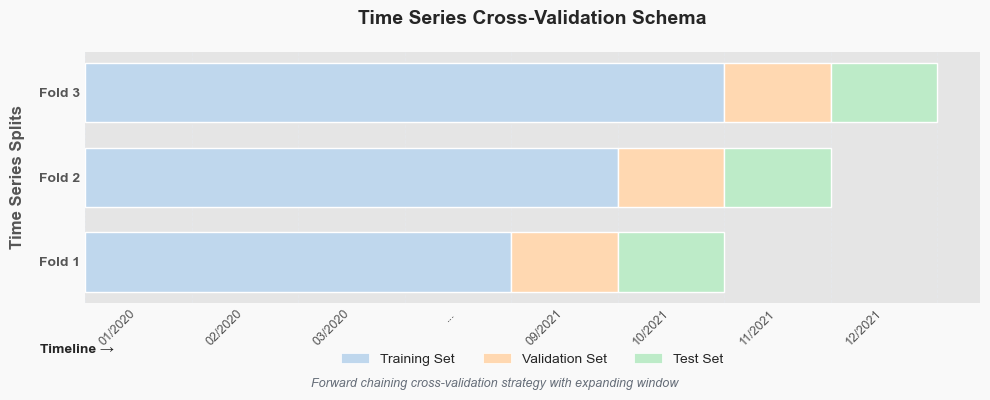

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.patches import Patch

# Thiết lập style
plt.style.use('ggplot')

# Dữ liệu
folds = ['Fold 1', 'Fold 2', 'Fold 3']
training_set = [4, 5, 6]
validation_set = [1, 1, 1]
test_set = [1, 1, 1]

# Tạo figure với kích thước lớn hơn và tỷ lệ đẹp hơn
fig, ax = plt.subplots(figsize=(10, 4), dpi=100, facecolor='#f9f9f9')

# Thiết lập màu sắc dịu nhẹ hơn
colors = {
    'training': '#BFD7ED',    # Xanh dương nhẹ
    'validation': '#FFD8B1',  # Cam nhẹ
    'test': '#BDEBC8'         # Xanh lá nhẹ
}

# Vị trí thanh
y_pos = np.arange(len(folds))
bar_height = 0.7

# Vẽ các thanh với hiệu ứng đổ bóng
training = ax.barh(y_pos, training_set, height=bar_height, color=colors['training'], 
                  label='Training Set', edgecolor='white', linewidth=1, zorder=10)
validation = ax.barh(y_pos, validation_set, height=bar_height, color=colors['validation'], 
                    left=training_set, label='Validation Set', edgecolor='white', 
                    linewidth=1, zorder=10)
test = ax.barh(y_pos, test_set, height=bar_height, color=colors['test'], 
              left=[5, 6, 7], label='Test Set', edgecolor='white', linewidth=1, zorder=10)

# Thêm nhãn số tháng vào các phần - đổi màu text sang tối hơn để dễ đọc trên nền nhạt
def add_labels(bars, color='#555555'):
    for bar in bars:
        width = bar.get_width()
        if width > 0:  # Chỉ hiển thị nhãn nếu thanh đủ rộng
            ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2, 
                   f'{width}m', ha='center', va='center', color=color, 
                   fontweight='bold', fontsize=8)

add_labels(training)
add_labels(validation)
add_labels(test)

# Định dạng trục y
ax.set_yticks(y_pos)
ax.set_yticklabels(folds, fontsize=10, fontweight='bold')
ax.set_ylabel('Time Series Splits', fontsize=12, fontweight='bold', labelpad=10)

# Định dạng trục x với tháng
months = ['01/2020', '02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', 
         '08/2020', '09/2020', '10/2020', '11/2020', '12/2020', 
         '01/2021', '02/2021', '03/2021', '04/2021', '05/2021', '06/2021', 
         '07/2021', '08/2021', '09/2021', '10/2021', '11/2021', '12/2021']

# Tạo ticks và grid dọc theo mỗi tháng
ax.set_xticks(np.arange(0.5, 8, 1), minor=True)
ax.set_xticks(np.arange(0, 9, 1))
ax.set_xticklabels(['' for _ in range(9)]) # Ẩn ticks chính
ax.set_xticklabels(['01/2020', '02/2020', '03/2020', '...', '09/2021', '10/2021', '11/2021', '12/2021'], 
                   minor=True, fontsize=9, rotation=45, ha='right')

# Tiêu đề
ax.set_title('Time Series Cross-Validation Schema', fontsize=14, fontweight='bold', pad=20)

# Grid và background
ax.set_axisbelow(True)
ax.xaxis.grid(True, linestyle='--', linewidth=0.7, color='#E6E9ED', zorder=0, alpha=0.7)
ax.yaxis.grid(False)

# Loại bỏ spines
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Thêm chú thích thời gian
ax.text(-0.05, -0.2, "Timeline →", transform=ax.transAxes, fontsize=10, fontweight='bold')

# Legend đẹp hơn với màu sắc tương ứng
legend_elements = [
    Patch(facecolor=colors['training'], edgecolor='white', label='Training Set'),
    Patch(facecolor=colors['validation'], edgecolor='white', label='Validation Set'),
    Patch(facecolor=colors['test'], edgecolor='white', label='Test Set')
]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=3, frameon=False, fontsize=10)

# Thêm chú thích
description = "Forward chaining cross-validation strategy with expanding window"
fig.text(0.5, 0.02, description, ha='center', fontsize=9, style='italic', color='#656D78')

# Xóa số trên trục x
ax.tick_params(axis='x', which='both', bottom=False)

plt.tight_layout()